# Lab Assignment #3 "Unsupervised Learning"


#### Completed by Yelyzaveta Ahapova (Group DA-01)¶

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(train.shape)
train.sample(5)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
490,491,0,3,"Hagland, Mr. Konrad Mathias Reiersen",male,NaN,1,0,65304,19.9667,NaN,S
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S
793,794,0,1,"Hoyt, Mr. William Fisher",male,NaN,0,0,PC 17600,30.6958,NaN,C
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,NaN,S
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,NaN,S


In [4]:
print(test.shape)
test.sample(5)

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
76,968,3,"Miles, Mr. Frank",male,NaN,0,0,359306,8.0500,NaN,S
226,1118,3,"Asplund, Mr. Johan Charles",male,23.0,0,0,350054,7.7958,NaN,S
15,907,2,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",female,24.0,1,0,SC/PARIS 2167,27.7208,NaN,C


In [5]:
print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [6]:
# Check for missing values
print("Train dataset:\n",train.isnull().sum(),"\n")
print("Test dataset:\n",test.isnull().sum())

Train dataset:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

Test dataset:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
# Values in the "Age", "Fare", Cabin" and "Embarked" features are missing. Let's imputate them.

# Replace missing values in the "Age" and "Fare" variables with the median
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Fare'].fillna(train['Fare'].median(), inplace=True)

test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)

# Replace missing values in the "Embarked" variable with the mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

# More than 70% of data in the "Cabin" variable is missing
# Let's create a new category "Unknown" for missing values
train['Cabin'].fillna('Unknown', inplace=True)
test['Cabin'].fillna('Unknown', inplace=True)

In [8]:
# Now we need to encode categorical variables for further clustering
# We will use one-hot encoding for "Sex" and "Embarked", and label encoding for "Cabin"

# One-hot encode the "Sex" and "Embarked" variables
train = pd.get_dummies(train, columns=['Sex', 'Embarked'])
test = pd.get_dummies(test, columns=['Sex', 'Embarked'])

# Label encode the "Cabin" variable
cabin_le = LabelEncoder()
cabin_le.fit(train['Cabin'])
train['Cabin'] = cabin_le.transform(train['Cabin'])
# Transform test data in the same way as the training data
test['Cabin'] = test['Cabin'].apply(lambda x: cabin_le.transform([x])[0] if x in cabin_le.classes_ else cabin_le.transform(['Unknown'])[0])

In [9]:
# Remove unneccessary columns inluding target variable "Survived" 
train.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [10]:
def cluster_data(data, n_clusters, algorithm):
    # Perform clustering
    if algorithm == 'KMeans':
        cluster_model = KMeans(n_clusters=n_clusters, random_state=42)
    elif algorithm == 'Agglomerative':
        cluster_model = AgglomerativeClustering(n_clusters=n_clusters)
    else:
        raise ValueError('Invalid algorithm specified')

    cluster_model.fit(data)
    labels = cluster_model.labels_

    # Calculate Silhouette Score
    silhouette = silhouette_score(data, labels, metric='euclidean')

    # Print Scores
    print(f"Silhouette Score for {algorithm} algorithm with {n_clusters} clusters: {silhouette:.3f}")
    
    # Calculate the mean value of each variable within each cluster
    print("Cluster characterization:\n",data.groupby(cluster_model.labels_).mean())

    return labels

Silhouette Score for KMeans algorithm with 2 clusters: 0.714
Cluster characterization:
      Pclass        Age     SibSp     Parch        Fare       Cabin  \
0  1.000000  36.050822  0.486301  0.438356  104.711587   59.910959   
1  2.565101  28.050671  0.530201  0.370470   17.994708  144.625503   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0    0.506849  0.493151    0.472603    0.013699    0.513699  
1    0.322148  0.677852    0.132886    0.100671    0.766443  


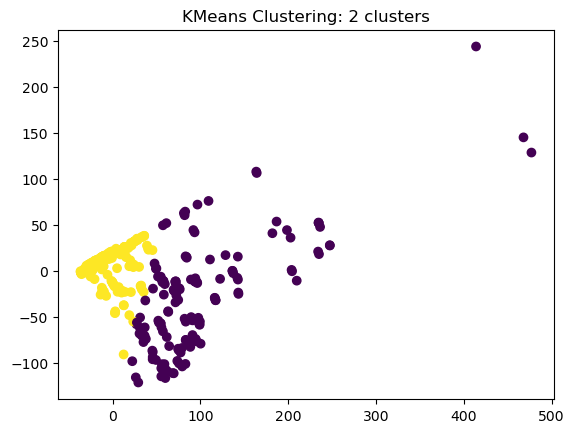

Silhouette Score for KMeans algorithm with 3 clusters: 0.710
Cluster characterization:
      Pclass        Age     SibSp     Parch        Fare       Cabin  \
0  1.000000  37.056212  0.462121  0.340909   74.243467   59.643939   
1  2.577808  27.946888  0.527740  0.370771   18.007633  145.255751   
2  1.000000  30.850000  0.750000  1.050000  279.308545   63.800000   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0    0.469697  0.530303    0.416667    0.015152    0.568182  
1    0.324763  0.675237    0.136671    0.101488    0.761840  
2    0.600000  0.400000    0.600000    0.000000    0.400000  


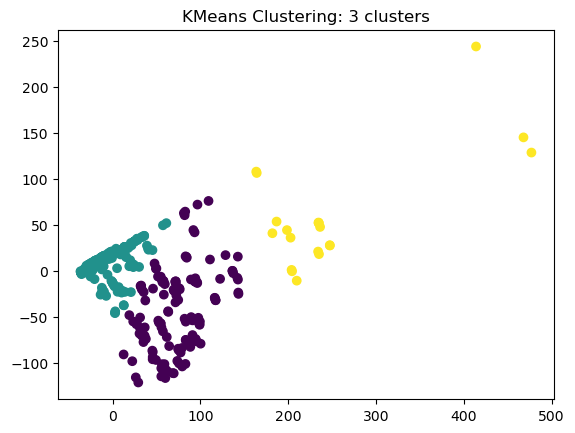

Silhouette Score for KMeans algorithm with 4 clusters: 0.708
Cluster characterization:
     Pclass        Age     SibSp     Parch        Fare       Cabin  Sex_female  \
0  2.58209  27.891113  0.529172  0.371777   17.986136  145.394844    0.322931   
1  1.00000  37.831897  0.448276  0.284483   62.236497   54.965517    0.431034   
2  1.00000  35.333333  0.000000  0.333333  512.329200   65.333333    0.333333   
3  1.00000  31.740571  0.685714  0.914286  190.907020   79.000000    0.714286   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0  0.677069    0.137042    0.101764    0.761194  
1  0.568966    0.422414    0.017241    0.560345  
2  0.666667    1.000000    0.000000    0.000000  
3  0.285714    0.428571    0.000000    0.571429  


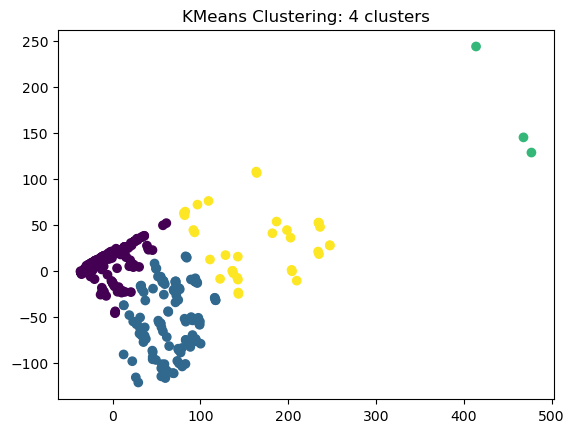

Silhouette Score for KMeans algorithm with 5 clusters: 0.649
Cluster characterization:
      Pclass        Age     SibSp     Parch        Fare       Cabin  \
0  1.384615  34.857143  1.219780  0.439560   79.736766  120.296703   
1  1.000000  35.333333  0.000000  0.333333  512.329200   65.333333   
2  1.000000  37.564935  0.298701  0.285714   53.145888   36.207792   
3  1.000000  30.663704  0.703704  1.111111  205.843052   62.592593   
4  2.632035  27.651876  0.451659  0.356421   14.792093  145.558442   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0    0.505495  0.494505    0.384615    0.021978    0.593407  
1    0.333333  0.666667    1.000000    0.000000    0.000000  
2    0.363636  0.636364    0.363636    0.000000    0.636364  
3    0.703704  0.296296    0.444444    0.000000    0.555556  
4    0.317460  0.682540    0.129870    0.108225    0.761905  


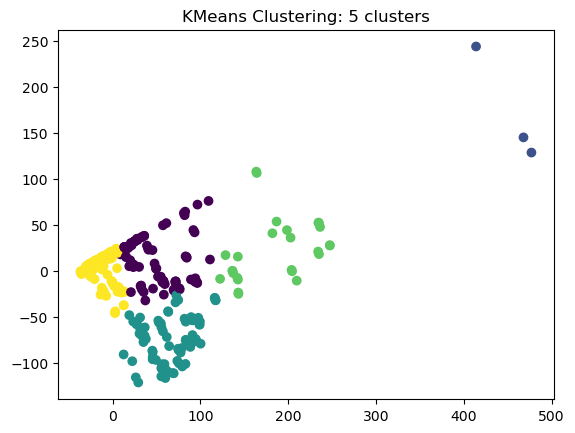

Silhouette Score for KMeans algorithm with 6 clusters: 0.597
Cluster characterization:
      Pclass        Age     SibSp     Parch        Fare       Cabin  \
0  2.653846  27.527737  0.421598  0.340237   14.160237  145.928994   
1  1.000000  33.802927  0.707317  0.658537  121.481398   84.097561   
2  1.000000  38.246479  0.267606  0.183099   48.534039   34.619718   
3  1.000000  35.333333  0.000000  0.333333  512.329200   65.333333   
4  1.578313  34.144578  1.421687  0.590361   61.551857  128.469880   
5  1.000000  30.058824  0.882353  1.176471  238.187253   63.529412   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0    0.318047  0.681953    0.133136    0.110947    0.755917  
1    0.634146  0.365854    0.463415    0.048780    0.487805  
2    0.338028  0.661972    0.366197    0.000000    0.633803  
3    0.333333  0.666667    1.000000    0.000000    0.000000  
4    0.445783  0.554217    0.253012    0.000000    0.746988  
5    0.647059  0.352941    0.529412    0.000000  

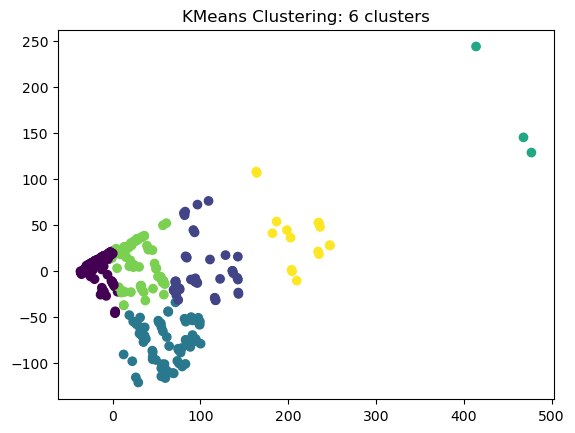

Silhouette Score for KMeans algorithm with 7 clusters: 0.418
Cluster characterization:
      Pclass        Age     SibSp     Parch        Fare       Cabin  \
0  2.233333  44.433333  0.253333  0.440000   18.564528  142.240000   
1  1.625000  32.847222  1.555556  0.638889   65.476388  129.458333   
2  1.000000  30.058824  0.882353  1.176471  238.187253   63.529412   
3  2.743017  23.114991  0.471136  0.310987   13.374572  146.469274   
4  1.000000  38.278571  0.257143  0.185714   48.100954   34.157143   
5  1.000000  33.855238  0.714286  0.642857  120.466364   83.690476   
6  1.000000  35.333333  0.000000  0.333333  512.329200   65.333333   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0    0.280000  0.720000    0.060000    0.040000    0.900000  
1    0.486111  0.513889    0.277778    0.000000    0.722222  
2    0.647059  0.352941    0.529412    0.000000    0.470588  
3    0.325885  0.674115    0.152700    0.128492    0.718808  
4    0.342857  0.657143    0.371429    0.

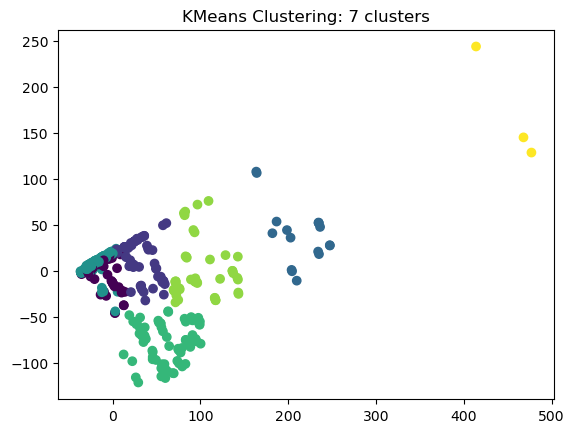

Silhouette Score for KMeans algorithm with 8 clusters: 0.438
Cluster characterization:
      Pclass        Age     SibSp     Parch        Fare       Cabin  \
0  1.062500  38.895833  0.520833  0.145833   58.621446   88.791667   
1  2.675347  30.328125  0.244792  0.204861   12.148465  146.197917   
2  1.000000  30.058824  0.882353  1.176471  238.187253   63.529412   
3  1.000000  38.346774  0.258065  0.209677   49.296037   29.725806   
4  1.000000  32.223226  0.645161  0.838710  132.556848   85.290323   
5  1.000000  35.333333  0.000000  0.333333  512.329200   65.333333   
6  1.759259  33.648148  1.500000  0.722222   63.701230  141.648148   
7  2.570000  10.147500  1.680000  1.160000   26.909501  146.090000   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0    0.500000  0.500000    0.375000    0.041667    0.583333  
1    0.281250  0.718750    0.118056    0.123264    0.758681  
2    0.647059  0.352941    0.529412    0.000000    0.470588  
3    0.354839  0.645161    0.3870

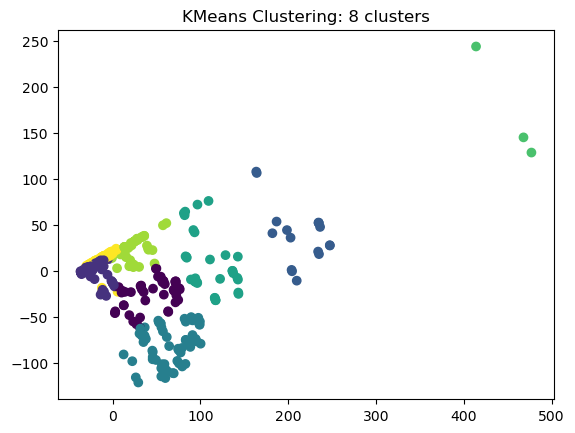

Silhouette Score for KMeans algorithm with 9 clusters: 0.435
Cluster characterization:
      Pclass        Age     SibSp     Parch        Fare       Cabin  \
0  2.796460  26.060841  0.247788  0.126106   10.502589  146.696903   
1  1.000000  39.889831  0.220339  0.203390   41.471329   32.542373   
2  1.000000  31.441481  0.592593  0.962963  133.329778   78.555556   
3  1.000000  30.058824  0.882353  1.176471  238.187253   63.529412   
4  1.000000  36.950000  0.700000  0.175000   77.946152   76.375000   
5  2.500000  10.380102  1.653061  1.204082   27.934268  145.581633   
6  1.000000  35.333333  0.000000  0.333333  512.329200   65.333333   
7  2.197183  44.697183  0.260563  0.471831   19.078140  141.570423   
8  1.698113  32.452830  1.566038  0.603774   70.743311  140.452830   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0    0.285398  0.714602    0.143805    0.143805    0.712389  
1    0.288136  0.711864    0.372881    0.000000    0.627119  
2    0.703704  0.296296  

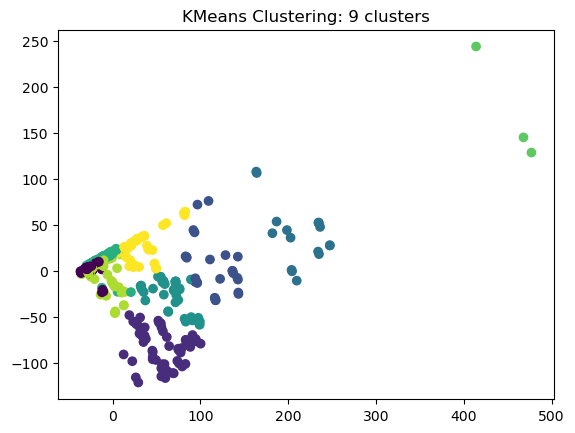

Silhouette Score for KMeans algorithm with 10 clusters: 0.449
Cluster characterization:
      Pclass        Age     SibSp     Parch        Fare       Cabin  \
0  1.000000  37.875000  0.750000  0.300000   83.012710   90.225000   
1  2.197183  44.697183  0.260563  0.471831   19.078140  141.570423   
2  1.000000  29.400000  1.000000  1.333333  239.608887   52.400000   
3  1.000000  38.278571  0.257143  0.185714   48.100954   34.157143   
4  1.000000  29.928000  0.533333  1.200000  141.614160   59.133333   
5  2.500000  10.380102  1.653061  1.204082   27.934268  145.581633   
6  1.000000  35.333333  0.000000  0.333333  512.329200   65.333333   
7  1.000000  34.600000  0.500000  0.200000  155.428330  142.700000   
8  1.804348  32.195652  1.717391  0.695652   65.281154  141.739130   
9  2.796460  26.060841  0.247788  0.126106   10.502589  146.696903   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0    0.550000  0.450000    0.575000    0.050000    0.375000  
1    0.302817  0

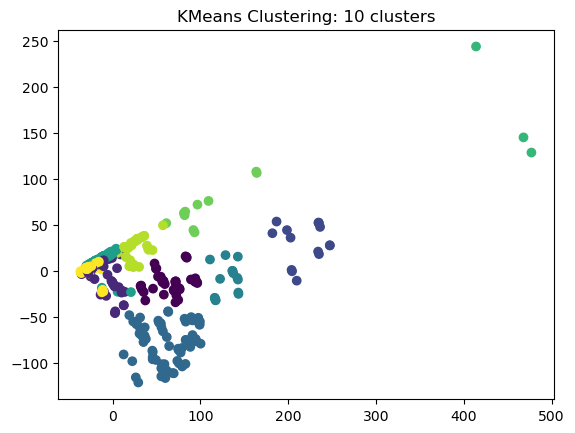

Silhouette Score for Agglomerative algorithm with 2 clusters: 0.657
Cluster characterization:
      Pclass        Age     SibSp     Parch       Fare       Cabin  Sex_female  \
0  1.187817  35.164569  0.786802  0.497462  93.535406   79.116751    0.482234   
1  2.626801  27.714337  0.448127  0.348703  14.794632  145.399135    0.315562   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0  0.517766    0.390863    0.010152    0.598985  
1  0.684438    0.131124    0.108069    0.760807  


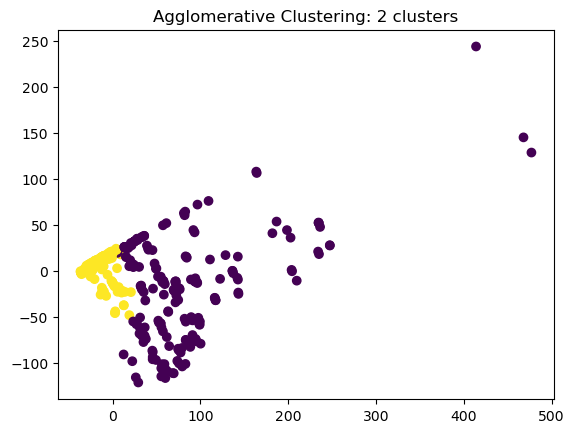

Silhouette Score for Agglomerative algorithm with 3 clusters: 0.647
Cluster characterization:
      Pclass        Age     SibSp     Parch        Fare       Cabin  \
0  1.000000  31.283810  0.666667  0.976190  207.112698   74.976190   
1  2.626801  27.714337  0.448127  0.348703   14.794632  145.399135   
2  1.238710  36.216129  0.819355  0.367742   62.759623   80.238710   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0    0.666667  0.333333    0.428571    0.000000    0.571429  
1    0.315562  0.684438    0.131124    0.108069    0.760807  
2    0.432258  0.567742    0.380645    0.012903    0.606452  


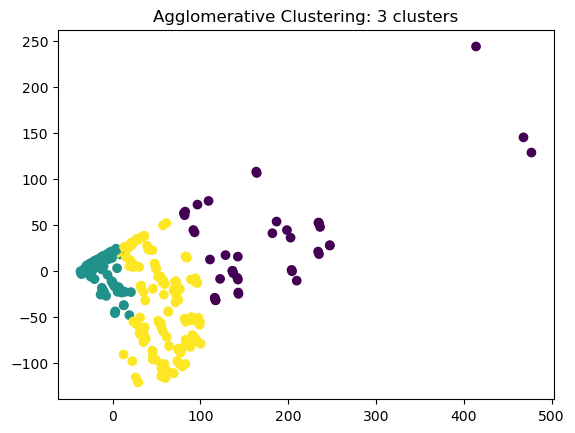

Silhouette Score for Agglomerative algorithm with 4 clusters: 0.652
Cluster characterization:
      Pclass        Age     SibSp     Parch        Fare       Cabin  \
0  1.238710  36.216129  0.819355  0.367742   62.759623   80.238710   
1  2.626801  27.714337  0.448127  0.348703   14.794632  145.399135   
2  1.000000  30.972308  0.717949  1.025641  183.634505   75.717949   
3  1.000000  35.333333  0.000000  0.333333  512.329200   65.333333   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0    0.432258  0.567742    0.380645    0.012903    0.606452  
1    0.315562  0.684438    0.131124    0.108069    0.760807  
2    0.692308  0.307692    0.384615    0.000000    0.615385  
3    0.333333  0.666667    1.000000    0.000000    0.000000  


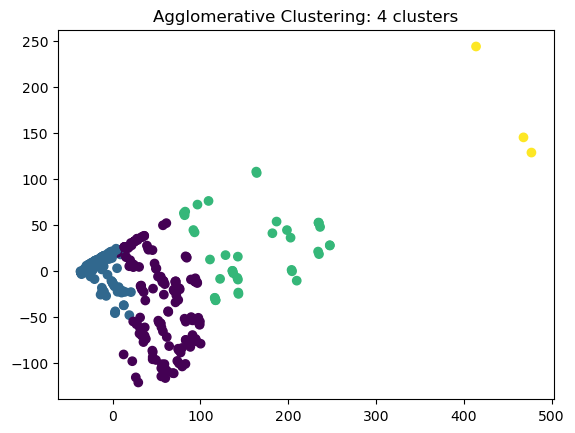

Silhouette Score for Agglomerative algorithm with 5 clusters: 0.633
Cluster characterization:
      Pclass        Age     SibSp     Parch        Fare       Cabin  \
0  1.000000  30.972308  0.717949  1.025641  183.634505   75.717949   
1  2.626801  27.714337  0.448127  0.348703   14.794632  145.399135   
2  1.430233  34.837209  1.267442  0.511628   74.270056  117.779070   
3  1.000000  35.333333  0.000000  0.333333  512.329200   65.333333   
4  1.000000  37.934783  0.260870  0.188406   48.413287   33.449275   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0    0.692308  0.307692    0.384615    0.000000    0.615385  
1    0.315562  0.684438    0.131124    0.108069    0.760807  
2    0.500000  0.500000    0.383721    0.023256    0.593023  
3    0.333333  0.666667    1.000000    0.000000    0.000000  
4    0.347826  0.652174    0.376812    0.000000    0.623188  


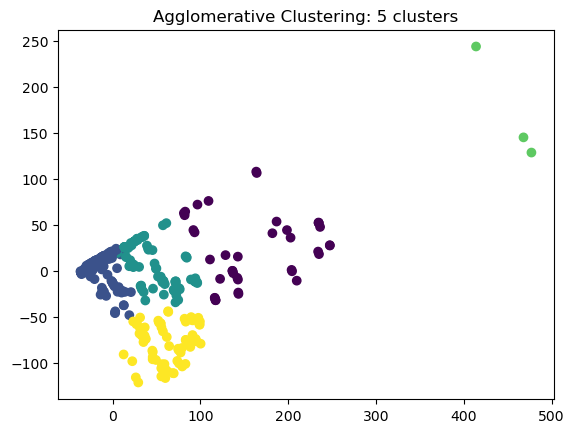

Silhouette Score for Agglomerative algorithm with 6 clusters: 0.635
Cluster characterization:
      Pclass        Age     SibSp     Parch        Fare       Cabin  \
0  1.430233  34.837209  1.267442  0.511628   74.270056  117.779070   
1  2.626801  27.714337  0.448127  0.348703   14.794632  145.399135   
2  1.000000  31.955000  0.541667  0.833333  148.650517   90.291667   
3  1.000000  35.333333  0.000000  0.333333  512.329200   65.333333   
4  1.000000  37.934783  0.260870  0.188406   48.413287   33.449275   
5  1.000000  29.400000  1.000000  1.333333  239.608887   52.400000   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0    0.500000  0.500000    0.383721    0.023256    0.593023  
1    0.315562  0.684438    0.131124    0.108069    0.760807  
2    0.708333  0.291667    0.333333    0.000000    0.666667  
3    0.333333  0.666667    1.000000    0.000000    0.000000  
4    0.347826  0.652174    0.376812    0.000000    0.623188  
5    0.666667  0.333333    0.466667    0.0

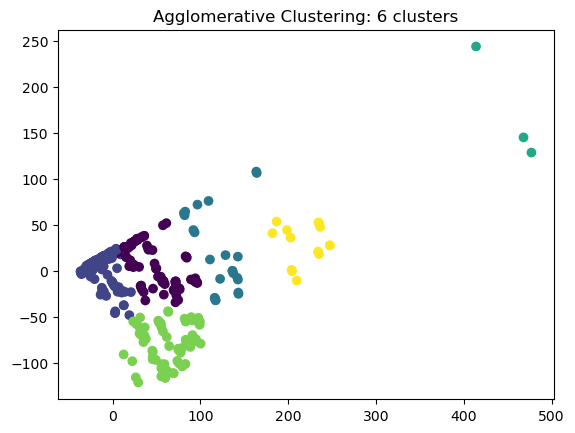

Silhouette Score for Agglomerative algorithm with 7 clusters: 0.573
Cluster characterization:
      Pclass        Age     SibSp     Parch        Fare       Cabin  \
0  2.626801  27.714337  0.448127  0.348703   14.794632  145.399135   
1  1.000000  37.934783  0.260870  0.188406   48.413287   33.449275   
2  1.000000  31.955000  0.541667  0.833333  148.650517   90.291667   
3  1.000000  35.333333  0.000000  0.333333  512.329200   65.333333   
4  1.000000  37.875000  0.750000  0.300000   83.012710   90.225000   
5  1.000000  29.400000  1.000000  1.333333  239.608887   52.400000   
6  1.804348  32.195652  1.717391  0.695652   66.667748  141.739130   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0    0.315562  0.684438    0.131124    0.108069    0.760807  
1    0.347826  0.652174    0.376812    0.000000    0.623188  
2    0.708333  0.291667    0.333333    0.000000    0.666667  
3    0.333333  0.666667    1.000000    0.000000    0.000000  
4    0.550000  0.450000    0.57500

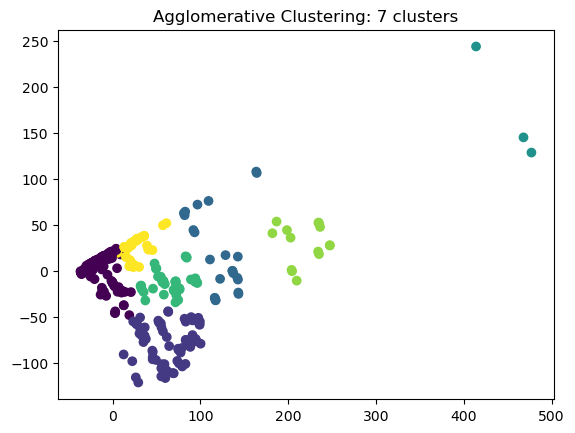

Silhouette Score for Agglomerative algorithm with 8 clusters: 0.378
Cluster characterization:
      Pclass        Age     SibSp     Parch        Fare       Cabin  \
0  2.797131  22.802766  0.459016  0.297131   12.432401  146.879098   
1  2.223301  39.349515  0.422330  0.470874   20.390595  141.893204   
2  1.000000  31.955000  0.541667  0.833333  148.650517   90.291667   
3  1.000000  37.934783  0.260870  0.188406   48.413287   33.449275   
4  1.000000  37.875000  0.750000  0.300000   83.012710   90.225000   
5  1.000000  29.400000  1.000000  1.333333  239.608887   52.400000   
6  1.804348  32.195652  1.717391  0.695652   66.667748  141.739130   
7  1.000000  35.333333  0.000000  0.333333  512.329200   65.333333   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0    0.295082  0.704918    0.145492    0.129098    0.725410  
1    0.364078  0.635922    0.097087    0.058252    0.844660  
2    0.708333  0.291667    0.333333    0.000000    0.666667  
3    0.347826  0.652174   

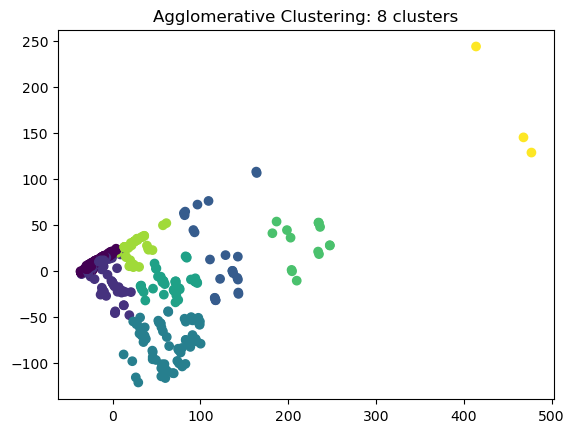

Silhouette Score for Agglomerative algorithm with 9 clusters: 0.424
Cluster characterization:
      Pclass        Age     SibSp     Parch        Fare       Cabin  \
0  1.000000  31.955000  0.541667  0.833333  148.650517   90.291667   
1  2.223301  39.349515  0.422330  0.470874   20.390595  141.893204   
2  2.827251  25.653285  0.180049  0.094891    9.421511  146.909976   
3  1.000000  37.934783  0.260870  0.188406   48.413287   33.449275   
4  1.000000  37.875000  0.750000  0.300000   83.012710   90.225000   
5  1.000000  29.400000  1.000000  1.333333  239.608887   52.400000   
6  1.804348  32.195652  1.717391  0.695652   66.667748  141.739130   
7  1.000000  35.333333  0.000000  0.333333  512.329200   65.333333   
8  2.636364   7.587662  1.948052  1.376623   28.503518  146.714286   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0    0.708333  0.291667    0.333333    0.000000    0.666667  
1    0.364078  0.635922    0.097087    0.058252    0.844660  
2    0.265207  0.7

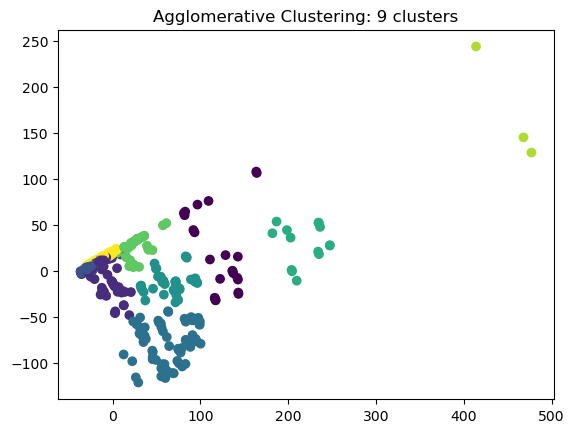

Silhouette Score for Agglomerative algorithm with 10 clusters: 0.430
Cluster characterization:
      Pclass        Age     SibSp     Parch        Fare       Cabin  \
0  2.223301  39.349515  0.422330  0.470874   20.390595  141.893204   
1  1.000000  37.934783  0.260870  0.188406   48.413287   33.449275   
2  2.827251  25.653285  0.180049  0.094891    9.421511  146.909976   
3  1.000000  35.333333  0.555556  0.222222  160.377778  142.222222   
4  1.000000  37.875000  0.750000  0.300000   83.012710   90.225000   
5  1.000000  29.400000  1.000000  1.333333  239.608887   52.400000   
6  1.804348  32.195652  1.717391  0.695652   66.667748  141.739130   
7  1.000000  35.333333  0.000000  0.333333  512.329200   65.333333   
8  2.636364   7.587662  1.948052  1.376623   28.503518  146.714286   
9  1.000000  29.928000  0.533333  1.200000  141.614160   59.133333   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0    0.364078  0.635922    0.097087    0.058252    0.844660  
1    0.34

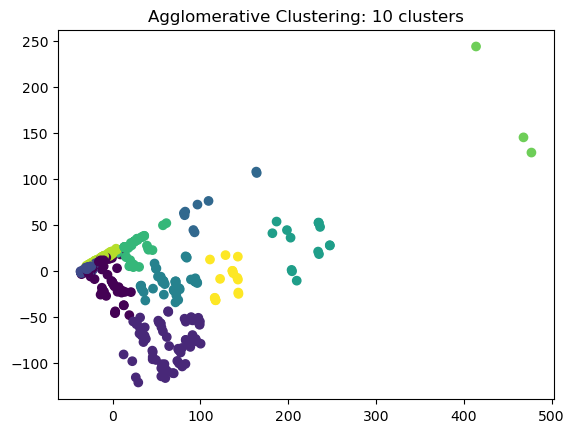

In [11]:
# PCA is used for dimensionality reduction 
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train)

# KMeans clustering
for n_clusters in range(2, 11):
    cluster_labels = cluster_data(train, n_clusters=n_clusters, algorithm='KMeans')
    plt.scatter(train_pca[:, 0], train_pca[:, 1], c=cluster_labels)
    plt.title(f"KMeans Clustering: {n_clusters} clusters")
    plt.show()

# Agglomerative Clustering
for n_clusters in range(2, 11):
    cluster_labels = cluster_data(train, n_clusters=n_clusters, algorithm='Agglomerative')
    plt.scatter(train_pca[:, 0], train_pca[:, 1], c=cluster_labels)
    plt.title(f"Agglomerative Clustering: {n_clusters} clusters")
    plt.show()

Silhouette Score for KMeans algorithm with 2 clusters: 0.803
Cluster characterization:
      Pclass        Age     SibSp     Parch        Fare       Cabin  \
0  2.359897  28.758355  0.429306  0.359897   22.444784  142.316195   
1  1.000000  40.879310  0.689655  0.827586  211.723138  105.896552   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0    0.347044  0.652956    0.213368    0.118252    0.668380  
1    0.586207  0.413793    0.655172    0.000000    0.344828  


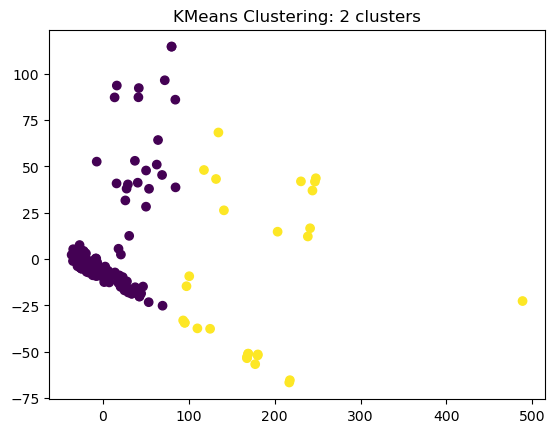

Silhouette Score for Agglomerative algorithm with 2 clusters: 0.803
Cluster characterization:
      Pclass        Age     SibSp     Parch        Fare       Cabin  \
0  2.359897  28.758355  0.429306  0.359897   22.444784  142.316195   
1  1.000000  40.879310  0.689655  0.827586  211.723138  105.896552   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0    0.347044  0.652956    0.213368    0.118252    0.668380  
1    0.586207  0.413793    0.655172    0.000000    0.344828  


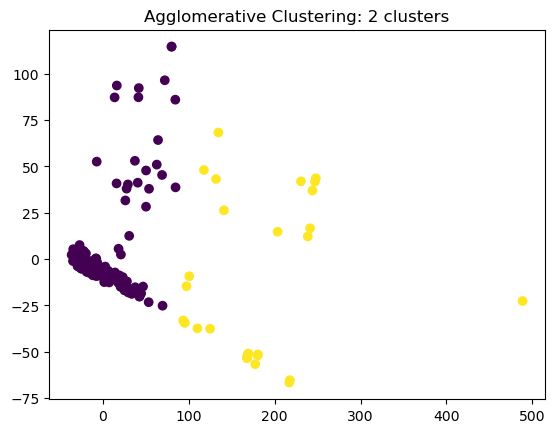

Silhouette Score for KMeans algorithm with 3 clusters: 0.705
Cluster characterization:
      Pclass        Age     SibSp     Parch        Fare       Cabin  \
0  2.477654  27.497207  0.405028  0.357542   18.201210  146.670391   
1  1.000000  43.805556  0.777778  1.000000  252.662506  102.444444   
2  1.000000  41.428571  0.666667  0.428571   90.643652   97.142857   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0    0.326816  0.673184    0.192737    0.125698    0.681564  
1    0.666667  0.333333    0.666667    0.000000    0.333333  
2    0.547619  0.452381    0.500000    0.023810    0.476190  


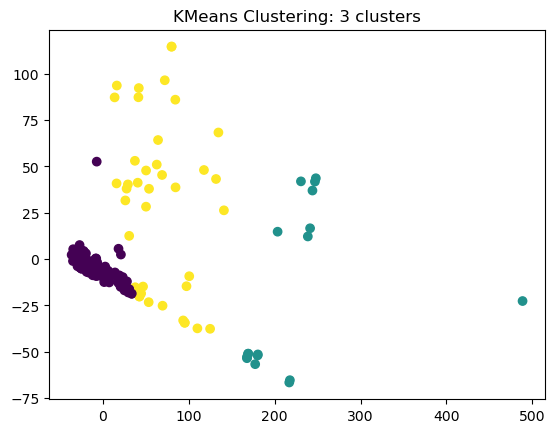

Silhouette Score for Agglomerative algorithm with 3 clusters: 0.644
Cluster characterization:
      Pclass        Age     SibSp     Parch        Fare       Cabin  \
0  1.000000  40.879310  0.689655  0.827586  211.723138  105.896552   
1  1.285714  37.651786  0.875000  0.750000   66.155730  114.946429   
2  2.540541  27.262763  0.354354  0.294294   15.093994  146.918919   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0    0.586207  0.413793    0.655172    0.000000    0.344828  
1    0.500000  0.500000    0.446429    0.017857    0.535714  
2    0.321321  0.678679    0.174174    0.135135    0.690691  


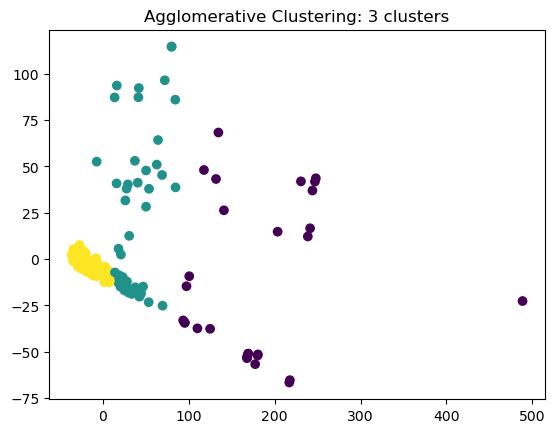

Silhouette Score for KMeans algorithm with 4 clusters: 0.656
Cluster characterization:
      Pclass        Age     SibSp     Parch        Fare       Cabin  \
0  2.537538  27.223724  0.351351  0.276276   14.998335  146.747748   
1  1.000000  43.805556  0.777778  1.000000  252.662506  102.444444   
2  1.000000  45.200000  0.800000  0.440000   79.577996   66.080000   
3  1.404762  33.059524  0.857143  1.023810   79.504074  144.500000   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0    0.321321  0.678679    0.177177    0.135135    0.687688  
1    0.666667  0.333333    0.666667    0.000000    0.333333  
2    0.640000  0.360000    0.400000    0.040000    0.560000  
3    0.404762  0.595238    0.500000    0.000000    0.500000  


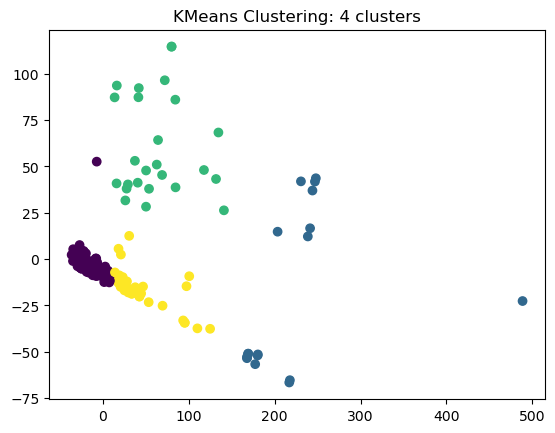

Silhouette Score for Agglomerative algorithm with 4 clusters: 0.649
Cluster characterization:
      Pclass        Age     SibSp     Parch        Fare       Cabin  \
0  1.285714  37.651786  0.875000  0.750000   66.155730  114.946429   
1  1.000000  42.750000  1.250000  2.000000  287.562500   46.750000   
2  2.540541  27.262763  0.354354  0.294294   15.093994  146.918919   
3  1.000000  40.166667  0.476190  0.380952  182.831952  128.428571   

   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0    0.500000  0.500000    0.446429    0.017857    0.535714  
1    0.625000  0.375000    0.750000    0.000000    0.250000  
2    0.321321  0.678679    0.174174    0.135135    0.690691  
3    0.571429  0.428571    0.619048    0.000000    0.380952  


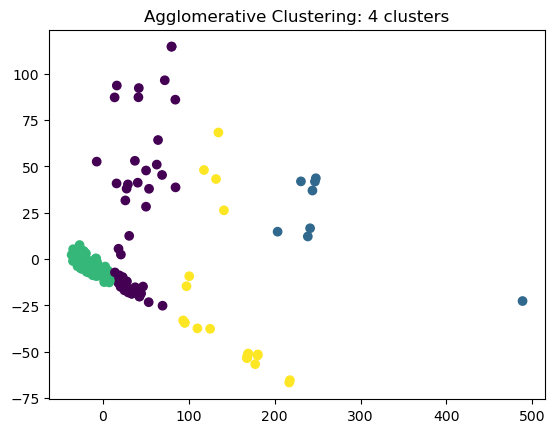

In [12]:
# According to the the highest silhouette score values and cluster characterization
# the best numbers of clusters are 2, 3 or 4
# Let's use these numbers of clusters for clustering test dataset

# PCA for dimensionality reduction 
pca = PCA(n_components=2)
test_pca = pca.fit_transform(test)

for n_clusters in range(2, 5):
    cluster_labels_kmeans = cluster_data(test, n_clusters=n_clusters, algorithm='KMeans')
    plt.scatter(test_pca[:, 0], test_pca[:, 1], c=cluster_labels_kmeans)
    plt.title(f"KMeans Clustering: {n_clusters} clusters")
    plt.show()
    
    cluster_labels_agglomerative = cluster_data(test, n_clusters=n_clusters, algorithm='Agglomerative')
    plt.scatter(test_pca[:, 0], test_pca[:, 1], c=cluster_labels_agglomerative)
    plt.title(f"Agglomerative Clustering: {n_clusters} clusters")
    plt.show()

### According to the obtained results, the highest silhouette score, which is 0.803, was obtained using 2 clusters, which is the optimal number of clusters for this dataset. This means that the objects within the clusters are very similar to each other and very dissimilar to objects in other clusters.